In [ ]:
!pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 8.6 MB/s eta 0:00:00


# Import Libraries

In [ ]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
from sklearn import svm
from sklearn.metrics import r2_score
from catboost import CatBoostRegressor, cv, Pool

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/lavibula/ML20222.PredictionBitcoin/main/data/data.csv")
df

,Date,BTC_close,BTC_open,BTC_high,BTC_low,difficulty,addresses_active_count,sum_lock_weight,mean_lock_size_ytes,total_fees_usd,...,ETH,LTC,XRP,DOGE,COPPER,GOLD,SILVER,SPX,JP225,DJI
0,2023-06-22,29890.5,29992.8,30497.8,29590.4,52350439455487,1000988,547153915,1.650655e+06,1.292778e+06,...,1872.32,85.97,0.49401,0.065567,3.8900,1923.70,22.467,4381.89,33445.0,34210.0
1,2023-06-21,29996.9,28307.7,30769.5,28270.5,52350439455487,920555,483181576,1.611773e+06,1.347976e+06,...,1889.87,85.12,0.49995,0.065644,3.9135,1944.90,22.810,4365.69,33390.0,34235.0
2,2023-06-20,28307.7,26845.9,28393.0,26665.5,52350439455487,951926,543133484,1.677592e+06,1.052364e+06,...,1791.61,80.31,0.49270,0.063108,3.8835,1947.70,23.234,4388.71,33155.0,34356.0
3,2023-06-19,26845.9,26339.7,27029.7,26295.1,52350439455487,920552,567091224,1.758290e+06,8.514319e+05,...,1737.06,77.51,0.49341,0.062429,3.8643,1964.05,24.062,0.00,0.0,0.0
4,2023-06-18,26339.7,26515.0,26679.3,26290.6,52350439455487,883864,603064705,1.985675e+06,7.946708e+05,...,1720.98,77.20,0.48699,0.062107,3.8738,1969.45,24.198,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2656,2016-03-14,414.3,412.4,416.1,411.2,158427203767,451902,437739524,7.199663e+05,1.689298e+04,...,0.00,0.00,0.00000,0.000000,0.0000,0.00,0.000,0.00,0.0,0.0
2657,2016-03-13,412.4,410.4,415.9,409.6,158427203767,421585,334817852,6.293569e+05,1.460678e+04,...,0.00,0.00,0.00000,0.000000,0.0000,0.00,0.000,0.00,0.0,0.0
2658,2016-03-12,410.4,419.1,420.7,407.0,158427203767,374730,331208848,5.750154e+05,1.398444e+04,...,0.00,0.00,0.00000,0.000000,0.0000,0.00,0.000,0.00,0.0,0.0
2659,2016-03-11,419.1,415.8,422.4,415.1,158427203767,434658,398582424,6.227850e+05,1.710193e+04,...,0.00,0.00,0.00000,0.000000,0.0000,0.00,0.000,0.00,0.0,0.0


In [ ]:

df=df[::-1]
df=df.reset_index(drop=True)
df

,Date,BTC_close,BTC_open,BTC_high,BTC_low,difficulty,addresses_active_count,sum_lock_weight,mean_lock_size_ytes,total_fees_usd,...,ETH,LTC,XRP,DOGE,COPPER,GOLD,SILVER,SPX,JP225,DJI
0,2016-03-10,415.8,412.8,417.5,410.3,158427203767,445273,426654988,6.881532e+05,1.731272e+04,...,0.00,0.00,0.00000,0.000000,0.0000,0.00,0.000,0.00,0.0,0.0
1,2016-03-11,419.1,415.8,422.4,415.1,158427203767,434658,398582424,6.227850e+05,1.710193e+04,...,0.00,0.00,0.00000,0.000000,0.0000,0.00,0.000,0.00,0.0,0.0
2,2016-03-12,410.4,419.1,420.7,407.0,158427203767,374730,331208848,5.750154e+05,1.398444e+04,...,0.00,0.00,0.00000,0.000000,0.0000,0.00,0.000,0.00,0.0,0.0
3,2016-03-13,412.4,410.4,415.9,409.6,158427203767,421585,334817852,6.293569e+05,1.460678e+04,...,0.00,0.00,0.00000,0.000000,0.0000,0.00,0.000,0.00,0.0,0.0
4,2016-03-14,414.3,412.4,416.1,411.2,158427203767,451902,437739524,7.199663e+05,1.689298e+04,...,0.00,0.00,0.00000,0.000000,0.0000,0.00,0.000,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2656,2023-06-18,26339.7,26515.0,26679.3,26290.6,52350439455487,883864,603064705,1.985675e+06,7.946708e+05,...,1720.98,77.20,0.48699,0.062107,3.8738,1969.45,24.198,0.00,0.0,0.0
2657,2023-06-19,26845.9,26339.7,27029.7,26295.1,52350439455487,920552,567091224,1.758290e+06,8.514319e+05,...,1737.06,77.51,0.49341,0.062429,3.8643,1964.05,24.062,0.00,0.0,0.0
2658,2023-06-20,28307.7,26845.9,28393.0,26665.5,52350439455487,951926,543133484,1.677592e+06,1.052364e+06,...,1791.61,80.31,0.49270,0.063108,3.8835,1947.70,23.234,4388.71,33155.0,34356.0
2659,2023-06-21,29996.9,28307.7,30769.5,28270.5,52350439455487,920555,483181576,1.611773e+06,1.347976e+06,...,1889.87,85.12,0.49995,0.065644,3.9135,1944.90,22.810,4365.69,33390.0,34235.0


In [ ]:
X_df = df.drop(columns=["BTC_close"])
y_df = df["BTC_close"]

In [ ]:
X_df['Date'] = pd.to_datetime(X_df['Date'])

# Devide dataset into training set and testing set

In [ ]:
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X_df, y_df, test_size=0.15, shuffle=False)


In [ ]:
X_train_df.shape,X_test_df.shape

((2261, 22), (400, 22))

In [ ]:
X_df['year'] = pd.to_datetime(X_df['Date']).dt.year
X_df['month'] = pd.to_datetime(X_df['Date']).dt.month
X_df['day'] = pd.to_datetime(X_df['Date']).dt.day

# Parameters Tunning

In [ ]:

score = 0
for depth in [6,7,8]:
  for learning_rate in [0.01,0.012,0.008]:
    for iterations in [175,125,150]:
 # for each combination of parameters, train an Catboost
     model = CatBoostRegressor(depth=depth,learning_rate=learning_rate,iterations=iterations)
     model.fit(X_train_df.drop('Date', axis=1)[:-1], y_train_df[1:])
 # evaluate the CatBoostRegressor on the test set
     y_test_pred = model.predict(X_test_df.drop('Date', axis=1))[:-1].reshape(-1,1)
     y_test_df = y_test_df.ravel()
     y_test_pred = y_test_pred.ravel()
 # if we got a better score, store the score and parameters
     if  r2_score(y_test_df[1:], y_test_pred)> score:
       score = r2_score(y_test_df[1:], y_test_pred)
       best_parameters = {'depth':depth,'learning_rate':learning_rate,'iterations':iterations}
print("Best score: {:.2f}".format(score))
print("Best parameters: {}".format(best_parameters))

0:	learn: 17163.9053168	total: 7.85ms	remaining: 1.37s
1:	learn: 17006.9671321	total: 14.9ms	remaining: 1.29s
2:	learn: 16853.3759520	total: 21.3ms	remaining: 1.22s
3:	learn: 16699.3853199	total: 27.6ms	remaining: 1.18s
4:	learn: 16546.9916724	total: 34.8ms	remaining: 1.18s
5:	learn: 16393.3116835	total: 41ms	remaining: 1.16s
6:	learn: 16243.1575781	total: 48.9ms	remaining: 1.17s
7:	learn: 16101.5756091	total: 56.1ms	remaining: 1.17s
8:	learn: 15952.1475175	total: 72ms	remaining: 1.33s
9:	learn: 15807.9737593	total: 84.2ms	remaining: 1.39s
10:	learn: 15664.5251055	total: 91.9ms	remaining: 1.37s
11:	learn: 15516.3508849	total: 98.3ms	remaining: 1.33s
12:	learn: 15376.1360166	total: 105ms	remaining: 1.31s
13:	learn: 15236.8571909	total: 112ms	remaining: 1.28s
14:	learn: 15100.5336248	total: 118ms	remaining: 1.26s
15:	learn: 14961.3861532	total: 128ms	remaining: 1.27s
16:	learn: 14824.5213821	total: 134ms	remaining: 1.25s
17:	learn: 14684.4192330	total: 140ms	remaining: 1.22s
18:	learn: 1

In [ ]:
params = {
    "depth": 7,
    "learning_rate": 0.01,
    "iterations": 150,
}

In [ ]:
model = CatBoostRegressor(**params)

In [ ]:
model.fit(X_train_df.drop('Date', axis=1)[:-1], y_train_df[1:])

0:	learn: 17164.8614146	total: 108ms	remaining: 16.2s
1:	learn: 17007.1703024	total: 150ms	remaining: 11.1s
2:	learn: 16852.5389481	total: 181ms	remaining: 8.87s
3:	learn: 16695.6647297	total: 226ms	remaining: 8.24s
4:	learn: 16546.2008296	total: 260ms	remaining: 7.55s
5:	learn: 16397.6719464	total: 289ms	remaining: 6.94s
6:	learn: 16248.8574273	total: 317ms	remaining: 6.48s
7:	learn: 16095.5189370	total: 346ms	remaining: 6.14s
8:	learn: 15950.2723894	total: 379ms	remaining: 5.94s
9:	learn: 15806.6038246	total: 402ms	remaining: 5.63s
10:	learn: 15667.5724250	total: 406ms	remaining: 5.13s
11:	learn: 15529.4987987	total: 443ms	remaining: 5.1s
12:	learn: 15388.6635751	total: 479ms	remaining: 5.05s
13:	learn: 15252.9911545	total: 530ms	remaining: 5.14s
14:	learn: 15115.4533180	total: 579ms	remaining: 5.21s
15:	learn: 14971.1251213	total: 633ms	remaining: 5.3s
16:	learn: 14831.4401647	total: 670ms	remaining: 5.24s
17:	learn: 14695.3810026	total: 708ms	remaining: 5.19s
18:	learn: 14559.18433

In [ ]:
y_train_pred = model.predict(X_train_df.drop('Date', axis=1)[:-1])
y_train_pred[:20]

array([4178.07665088, 4191.69226757, 4256.96315858, 4191.45619067,
       4174.47841159, 4180.49011737, 4881.26804564, 4459.22918319,
       4270.96460754, 4203.710843  , 4171.84318348, 4160.3482755 ,
       4160.3482755 , 4162.22086684, 4175.28801589, 4203.710843  ,
       4151.38412439, 4188.39715183, 4135.55214247, 4188.95281618])

In [ ]:
y_train_df = y_train_df.ravel()
y_train_pred = y_train_pred.ravel()

# Training Results

<ipython-input-20-157c5f217057>:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_ticks = np.linspace(0, len(df.Date[1:len(y_train_df)])-1, num_ticks, dtype=np.int)


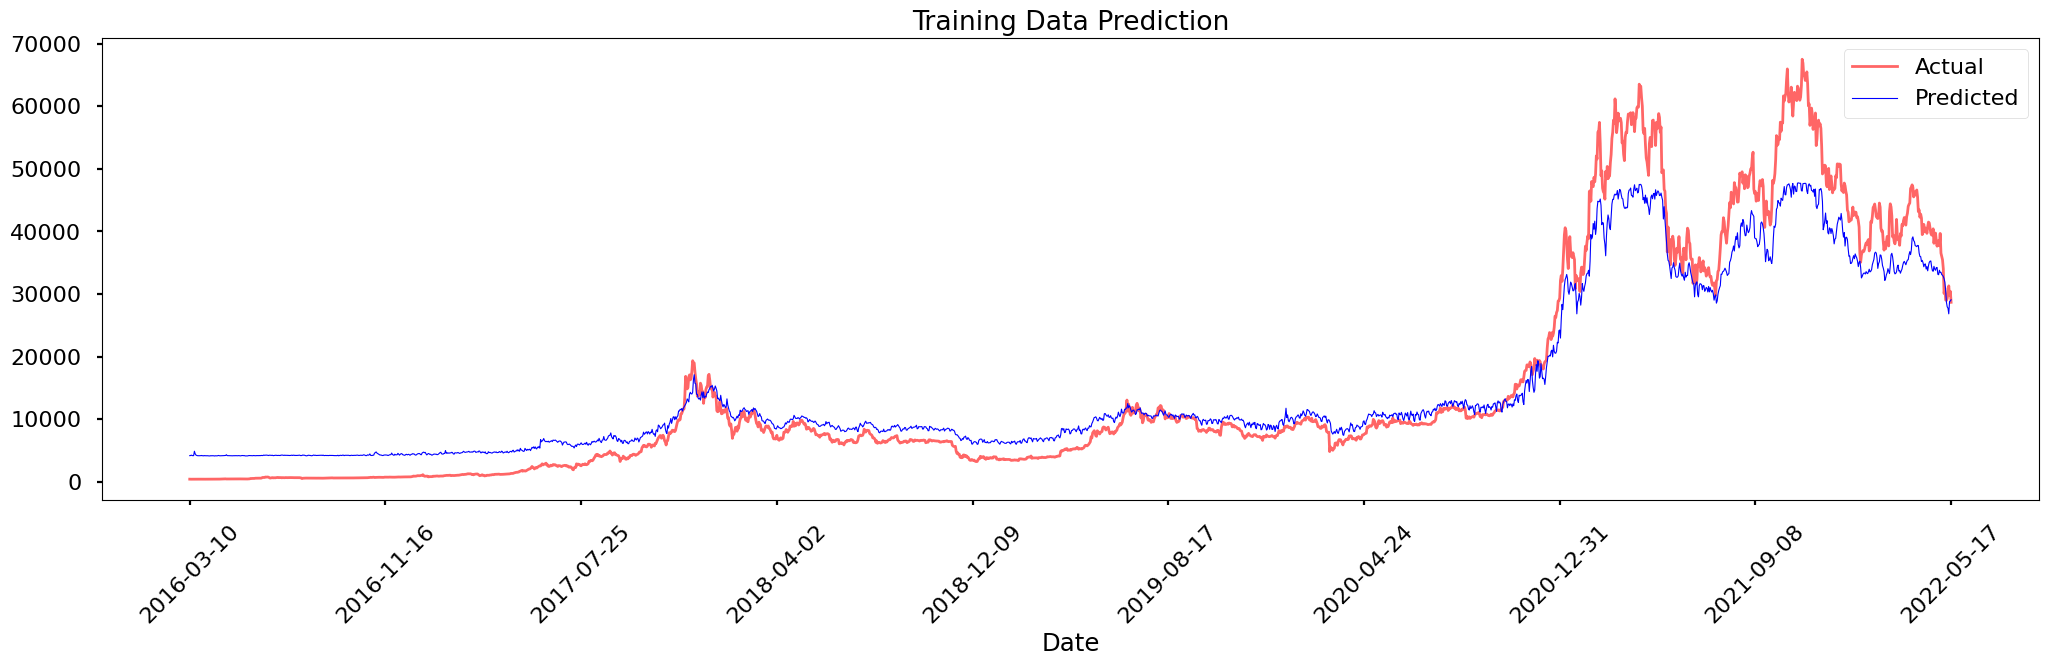

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

# Set the number of visible x-axis tick labels
num_ticks = 10  # Adjust the number of ticks as needed

plt.figure(figsize=(25, 6))
plt.plot(df.Date[1:len(y_train_df)], y_train_df[1:], color='red', linewidth=2.0, alpha=0.6)
plt.plot(df.Date[1:len(y_train_df)], y_train_pred, color='blue', linewidth=0.8)
plt.legend(['Actual', 'Predicted'])
plt.xlabel('Date')
plt.title("Training Data Prediction")

# Customize x-axis tick labels
x_ticks = np.linspace(0, len(df.Date[1:len(y_train_df)])-1, num_ticks, dtype=np.int)
plt.xticks(x_ticks, df.Date[x_ticks], rotation=45)  # Adjust rotation angle as needed

plt.show()


In [ ]:
y_test_pred=model.predict(X_test_df.drop('Date', axis=1)[:-1])
y_test_pred[0:10]

array([27753.8929967 , 28344.42707189, 27936.067745  , 28014.47183831,
       29250.61719379, 27551.54623987, 29066.68680205, 27818.28013228,
       27851.06594169, 26709.8259701 ])

In [ ]:
y_test_df = y_test_df.ravel()
y_test_pred = y_test_pred.ravel()

# Testing Results

<ipython-input-23-0a2b028ef2fb>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_ticks = np.linspace(0, len(df.Date[len(y_train_df)+1:])-1, num_ticks, dtype=np.int)


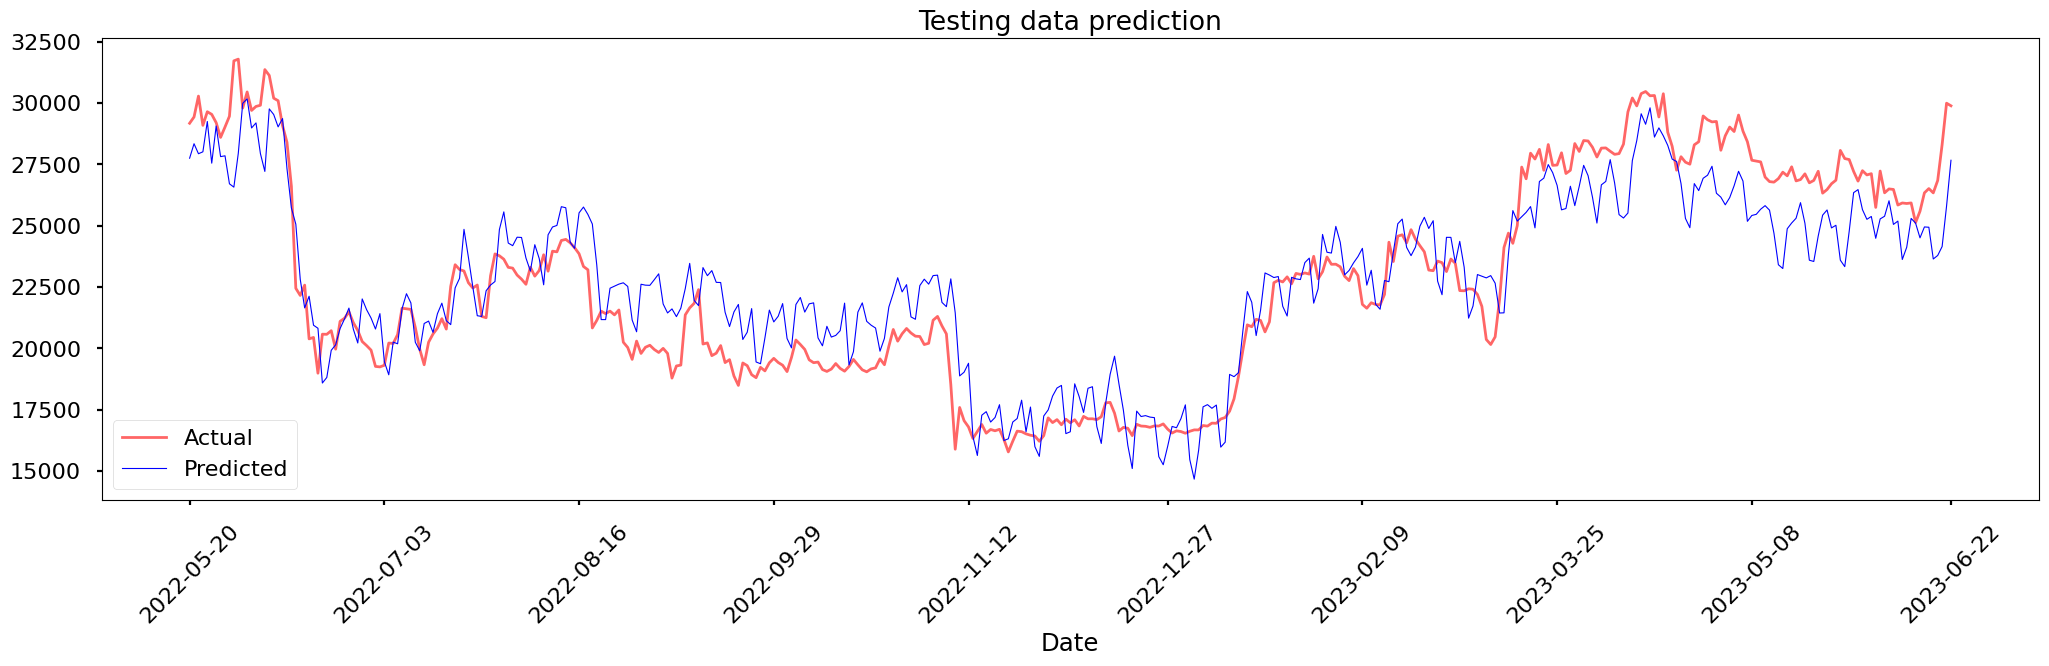

In [ ]:
num_ticks = 10  # Adjust the number of ticks as needed
plt.figure(figsize=(25,6))
plt.plot(df.Date[len(y_train_df)+1:], y_test_df[1:], color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(df.Date[len(y_train_df)+1:], y_test_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Date')
plt.title("Testing data prediction")
# Customize x-axis tick labels
x_ticks = np.linspace(0, len(df.Date[len(y_train_df)+1:])-1, num_ticks, dtype=np.int)
plt.xticks(x_ticks, df.Date[len(y_train_df)+1+x_ticks], rotation=45)  # Adjust rotation angle as needed
plt.show()

In [ ]:
y_test_df = y_test_df.ravel()
y_test_pred = y_test_pred.ravel()

# Overall Results

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
import numpy as np
from sklearn.metrics import r2_score
print("Test accuracy for train set")
#RMSE
print("Root Mean Square Error (RMSE):", np.sqrt(mean_squared_error(y_train_df[1:],y_train_pred)))

#MAPE
print(" Mean Absolute Percentage Error (MAPE):", mean_absolute_percentage_error(y_train_df[1:],y_train_pred))
print("R2 score:", r2_score(y_train_df[1:],y_train_pred))
print("Test accuracy for test set")
#RMSE
print("Root Mean Square Error (RMSE):", np.sqrt(mean_squared_error(y_test_df[1:],y_test_pred)))

#MAPE
print(" Mean Absolute Percentage Error (MAPE):", mean_absolute_percentage_error(y_test_df[1:],y_test_pred))
print("R2 score:", r2_score(y_test_df[1:],y_test_pred))

Test accuracy for train set
Root Mean Square Error (RMSE): 4556.628938659237
 Mean Absolute Percentage Error (MAPE): 1.2583318492720899
R2 score: 0.9308284468942367
Test accuracy for test set
Root Mean Square Error (RMSE): 1695.428590405234
 Mean Absolute Percentage Error (MAPE): 0.06128867120727861
R2 score: 0.8385313970998898
